In [11]:
##import requests
import pandas as pd
import json



with open('/content/Quiz_Endpoint.json', 'r') as f:
    quiz = json.load(f)

with open('/content/Quiz_Submission_Data.json', 'r') as f:
    submission = json.load(f)

with open('/content/Api_Endpoint.json', 'r') as f:
    historical_answers= json.load(f)

# Checking the  Quiz Data
print("\nQuiz Data Overview:")
print("Keys:", quiz.keys())
print("Sample:", quiz.get("quiz", {}).get("title", "No Title Found"))

# the same for  Submission Data
print("\nSubmission Data Overview:")
print("Keys:", submission.keys())
print("Sample:", submission.get("score", "No Score Found"))

print("\nHistorical Data Overview:")
print("Number of Records:", len(historical_answers))
print("Sample Record:", historical_answers[0] if historical_answers else "No Data Found")

historical_df = pd.DataFrame(historical_answers)

if not historical_df.empty:
    print("\nHistorical Dataframe Summary:")
    print(historical_df.describe())
    print("\nColumns:", historical_df.columns)
else:
    print("\nHistorical Data is Empty")



Quiz Data Overview:
Keys: dict_keys(['quiz'])
Sample: Structural Organisation in Animals and Plants (7)

Submission Data Overview:
Keys: dict_keys(['id', 'quiz_id', 'user_id', 'submitted_at', 'created_at', 'updated_at', 'score', 'trophy_level', 'accuracy', 'speed', 'final_score', 'negative_score', 'correct_answers', 'incorrect_answers', 'source', 'type', 'started_at', 'ended_at', 'duration', 'better_than', 'total_questions', 'rank_text', 'mistakes_corrected', 'initial_mistake_count', 'response_map', 'quiz', 'next_steps'])
Sample: 32

Historical Data Overview:
Number of Records: 14
Sample Record: {'id': 336497, 'quiz_id': 51, 'user_id': 'YcDFSO4ZukTJnnFMgRNVwZTE4j42', 'submitted_at': '2025-01-17T15:30:18.027+05:30', 'created_at': '2025-01-17T15:30:18.044+05:30', 'updated_at': '2025-01-17T15:30:18.044+05:30', 'score': 108, 'trophy_level': 2, 'accuracy': '90 %', 'speed': '100', 'final_score': '105.0', 'negative_score': '3.0', 'correct_answers': 27, 'incorrect_answers': 3, 'source': 'exam

In [12]:
import json
import pandas as pd
import matplotlib.pyplot as plt

## Loading and parsing the corresponding data files namely quiz, submission and historical data of the submissions

def parse_quiz_data(json_data):
    quiz_info = json_data.get("quiz", {})
    quiz_details = {
        "quiz_id": quiz_info.get("id"),
        "title": quiz_info.get("title"),
        "topic": quiz_info.get("topic"),
        "questions_count": quiz_info.get("questions_count"),
        "correct_answer_marks": float(quiz_info.get("correct_answer_marks", 0)),
        "negative_marks": float(quiz_info.get("negative_marks", 0)),
    }
    return quiz_details


def parse_submission_data(json_data):
    submission_details = {
        "submission_id": json_data["id"],
        "user_id": json_data["user_id"],
        "score": float(json_data["score"]),
        "accuracy": float(json_data["accuracy"].strip('%')) / 100,
        "correct_answers": json_data["correct_answers"],
        "incorrect_answers": json_data["incorrect_answers"],
        "duration": json_data["duration"],
        "response_map": json_data["response_map"]
    }
    return submission_details

def parse_historical_data(json_data):
    historical_performance = []
    for entry in json_data:
        performance = {
            "submission_id": entry["id"],
            "quiz_id": entry["quiz_id"],
            "score": float(entry["score"]),
            "accuracy": float(entry["accuracy"].strip('%')) / 100,
            "correct_answers": entry["correct_answers"],
            "incorrect_answers": entry["incorrect_answers"],
            "response_map": entry["response_map"]
        }
        historical_performance.append(performance) ## Adding the dictionary performance to the list historical_performance.
    return historical_performance


def analyze_submission_performance(submissions):
    total_score = sum([sub["score"] for sub in submissions])
    avg_accuracy = sum([sub["accuracy"] for sub in submissions]) / len(submissions)
    total_correct = sum([sub["correct_answers"] for sub in submissions])
    total_incorrect = sum([sub["incorrect_answers"] for sub in submissions])

    summary = {
        "total_score": total_score,
        "average_accuracy": avg_accuracy,
        "total_correct_answers": total_correct,
        "total_incorrect_answers": total_incorrect
    }
    return summary  ## dictionary with aggregated values (total score, average accuracy, etc.).

def analyze_historical_performance(historical_data):
    scores = [entry["score"] for entry in historical_data]
    avg_score = sum(scores) / len(scores)
    max_score = max(scores)
    min_score = min(scores)

    insights = {
        "average_score": avg_score,
        "max_score": max_score,
        "min_score": min_score
    }
    return insights



User Insights: {'weak_areas': [6, 51, 57, 6, 20, 18, 58, 50], 'improvement_trends': ['Improving', 'Improving', 'Improving', 'Needs Work', 'Needs Work', 'Needs Work', 'Needs Work', 'Needs Work', 'Improving', 'Needs Work', 'Improving', 'Improving', 'Needs Work', 'Needs Work'], 'performance_gaps': [51, 57, 6, 20, 58, 50]}
Recommendations: [{'quiz_id': 51, 'recommendation': 'Maintain current performance.'}, {'quiz_id': 6, 'recommendation': 'Maintain current performance.'}, {'quiz_id': 51, 'recommendation': 'Maintain current performance.'}, {'quiz_id': 6, 'recommendation': 'Maintain current performance.'}, {'quiz_id': 51, 'recommendation': 'Focus on improving overall accuracy.'}, {'quiz_id': 57, 'recommendation': 'Focus on improving overall accuracy.'}, {'quiz_id': 6, 'recommendation': 'Focus on improving overall accuracy.'}, {'quiz_id': 20, 'recommendation': 'Focus on improving overall accuracy.'}, {'quiz_id': 24, 'recommendation': 'Maintain current performance.'}, {'quiz_id': 18, 'recomme

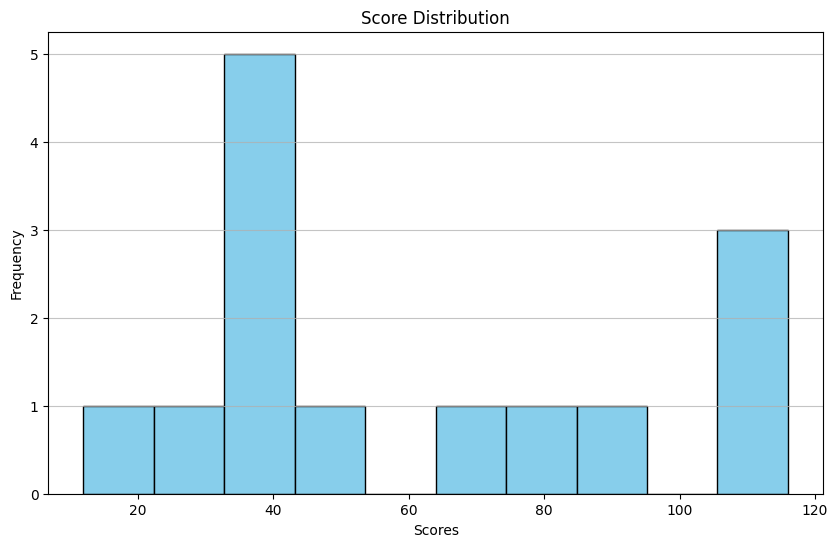

Historical performance with recommendations exported to historical_performance_with_recommendations.csv
Recommendations exported to recommendations.csv

--- Sample Recommendations ---
   quiz_id                        recommendation
0       51         Maintain current performance.
1        6         Maintain current performance.
2       51         Maintain current performance.
3        6         Maintain current performance.
4       51  Focus on improving overall accuracy.
Data exported to submissions.csv
Data exported to historical_performance.csv


In [14]:
# in this function we fetch the topic from the quiz data by matching it with the quiz_id
def analyze_performance_by_topic(historical_data, quiz_data):
    topic_performance = {}
    for entry in historical_data:
        topic = quiz_data.get(entry["quiz_id"], {}).get("topic", "Unknown")
        if topic not in topic_performance:
            topic_performance[topic] = {"total_score": 0, "attempts": 0}
        topic_performance[topic]["total_score"] += entry["score"]
        topic_performance[topic]["attempts"] += 1  ## increments the attempt count for the topic.

    for topic, data in topic_performance.items():
        data["average_score"] = data["total_score"] / data["attempts"]  ## this is important  calculate the average
         ## score for each topic.

    return topic_performance

def generate_user_insights(historical_data):
    insights = {
        "weak_areas": [],
        "improvement_trends": [],
        "performance_gaps": []
    }
    scores = [entry["score"] for entry in historical_data] ## Collects a list of improvement trends based on whether the score is greater than the average score.
    avg_score = sum(scores) / len(scores)

    for entry in historical_data:
        if entry["score"] < avg_score:   ## score is lower than the average score then append the quiz ID to weak_areas.
            insights["weak_areas"].append(entry["quiz_id"])
        if entry["accuracy"] < 0.75:
            insights["performance_gaps"].append(entry["quiz_id"])

    insights["improvement_trends"] = [
        "Improving" if entry["score"] > avg_score else "Needs Work"
        for entry in historical_data
    ]

    return insights

def create_recommendations(historical_data):
    recommendations = []

    for entry in historical_data:
        if entry.get("accuracy", 0) < 0.75:
            recommendation_text = "Focus on improving overall accuracy."
        elif entry.get("correct_answers", 0) < entry.get("incorrect_answers", 0):
            recommendation_text = "Pay more attention to correctness."
        else:
            recommendation_text = "Maintain current performance."

        recommendation = {
            "quiz_id": entry.get("quiz_id", "Unknown"),
            "recommendation": recommendation_text
        }
        recommendations.append(recommendation)

    return recommendations

# Bonus: Define Student Persona from the assignment
def define_student_persona(historical_data):
    persona = {
        "strengths": [],
        "weaknesses": [],
        "labels": []
    }

    for entry in historical_data:
        if entry["accuracy"] > 0.85:
            persona["strengths"].append(f"Quiz {entry['quiz_id']}: High Accuracy")
        if entry["accuracy"] < 0.5:
            persona["weaknesses"].append(f"Quiz {entry['quiz_id']}: Low Accuracy")

    if len(persona["strengths"]) > len(persona["weaknesses"]):
        persona["labels"].append("Consistent Performer") ##comparing the number of strengths and weaknesses to assign labels like "Consistent Performer"
    else:
        persona["labels"].append("Needs Targeted Practice")

    return persona


#  Visualization
def plot_histogram(data, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    plt.hist(data, bins=10, color='skyblue', edgecolor='black')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(axis='y', alpha=0.75)
    plt.show()

# Now to get the results in the csv file by exporitng to CSV
def export_to_csv(data, filename):
    df = pd.DataFrame(data)
    df.to_csv(filename, index=False)
    print(f"Data exported to {filename}")

# Load JSON data from files
with open('/content/Quiz_Endpoint.json', 'r') as f:
    quiz = json.load(f)

with open('/content/Quiz_Submission_Data.json', 'r') as f:
    submission = json.load(f)

with open('/content/Api_Endpoint.json', 'r') as f:
    historical_answers = json.load(f)

quiz_data = parse_quiz_data(quiz)
submission_data = parse_submission_data(submission)
historical_data = parse_historical_data(historical_answers)

##print("Quiz Data:", quiz_data)
##print("Submission Data:", submission_data)
##print("Historical Data:", historical_data)

quiz_data_map = {quiz_data["quiz_id"]: quiz_data}

submission_summary = analyze_submission_performance([submission_data])
historical_insights = analyze_historical_performance(historical_data)

##print("Submission Summary:", submission_summary)
##print("Historical Insights:", historical_insights)

topic_performance = analyze_performance_by_topic(historical_data, quiz_data_map)
user_insights = generate_user_insights(historical_data)
recommendations = create_recommendations(historical_data)
student_persona = define_student_persona(historical_data)

##print("Topic Performance:", topic_performance)  ## these are optional to print
print("User Insights:", user_insights)
print("Recommendations:", recommendations)
print("Student Persona:", student_persona)

plot_histogram([entry["score"] for entry in historical_data], "Score Distribution", "Scores", "Frequency")

recommendations_df = pd.DataFrame(recommendations)
historical_df = pd.concat([historical_df, recommendations_df.set_index(historical_df.index)], axis=1)

output_file = "historical_performance_with_recommendations.csv"
historical_df.to_csv(output_file, index=False)
print(f"Historical performance with recommendations exported to {output_file}")

# Exporting Recommendations to Separate CSV
recommendations_file = "recommendations.csv"
recommendations_df.to_csv(recommendations_file, index=False)
print(f"Recommendations exported to {recommendations_file}")

print("\n--- Sample Recommendations ---")
print(recommendations_df.head())

export_to_csv([submission_data], "submissions.csv")
export_to_csv(historical_data, "historical_performance.csv")
